# Car Price Prediction Project

*Importing Libraries* 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

*Reading Car_price Datasets*

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.set_index('car_ID',inplace=True)
df.drop(columns=['CarName'],axis=1,inplace=True)

In [3]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 17  st

In [5]:
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [7]:
df_ob=df.select_dtypes(include = ['object'])
cat_col = df_ob.nunique().index.to_list()
df.drop(columns=cat_col,axis=1).skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

# EDA

<Axes: >

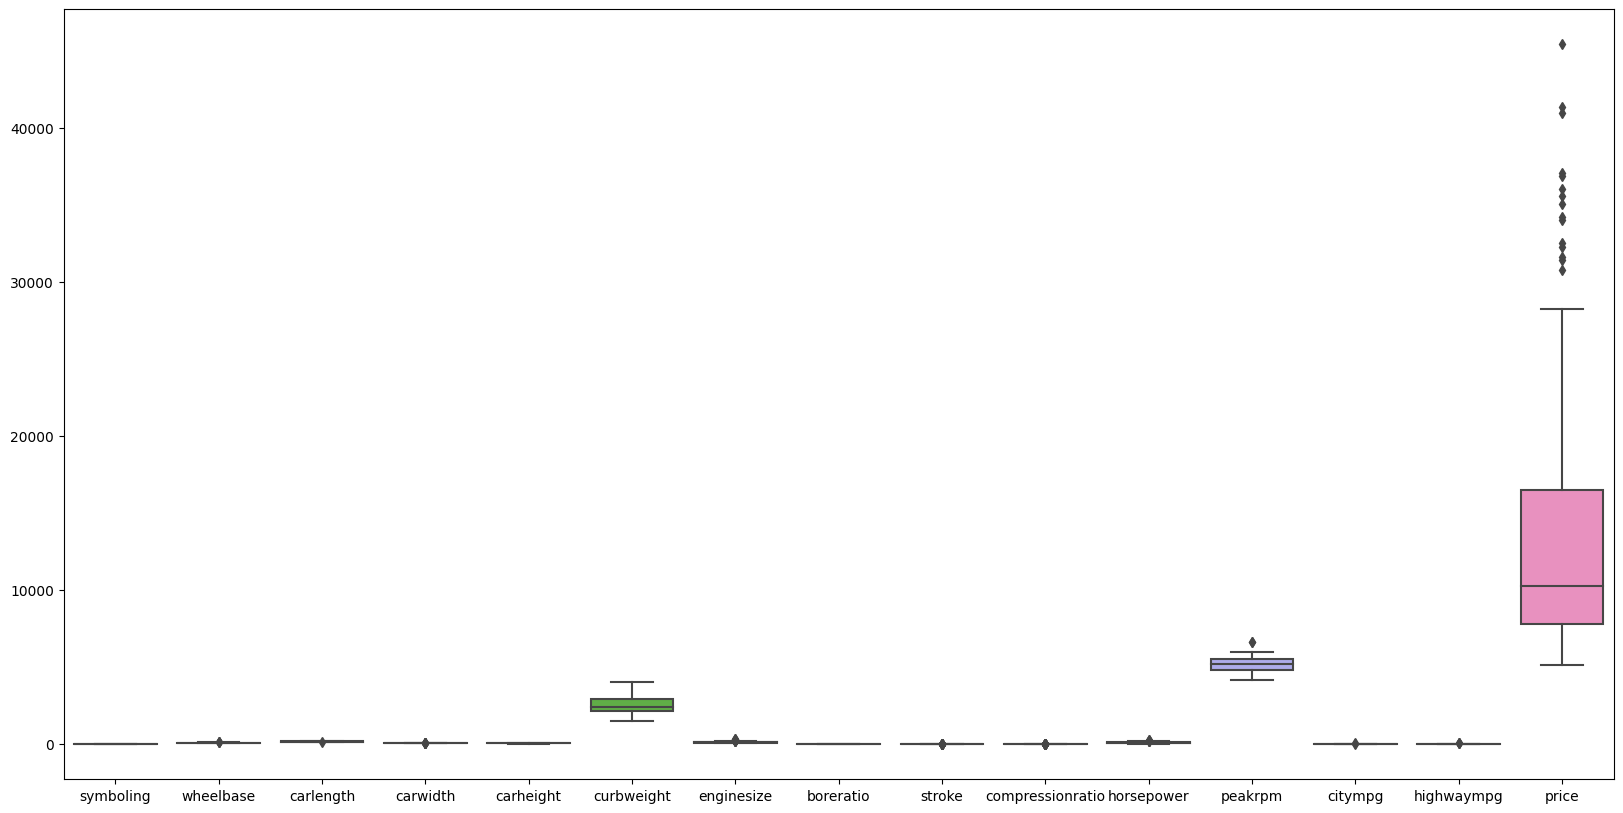

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

### *Removing Outliers*

<Axes: >

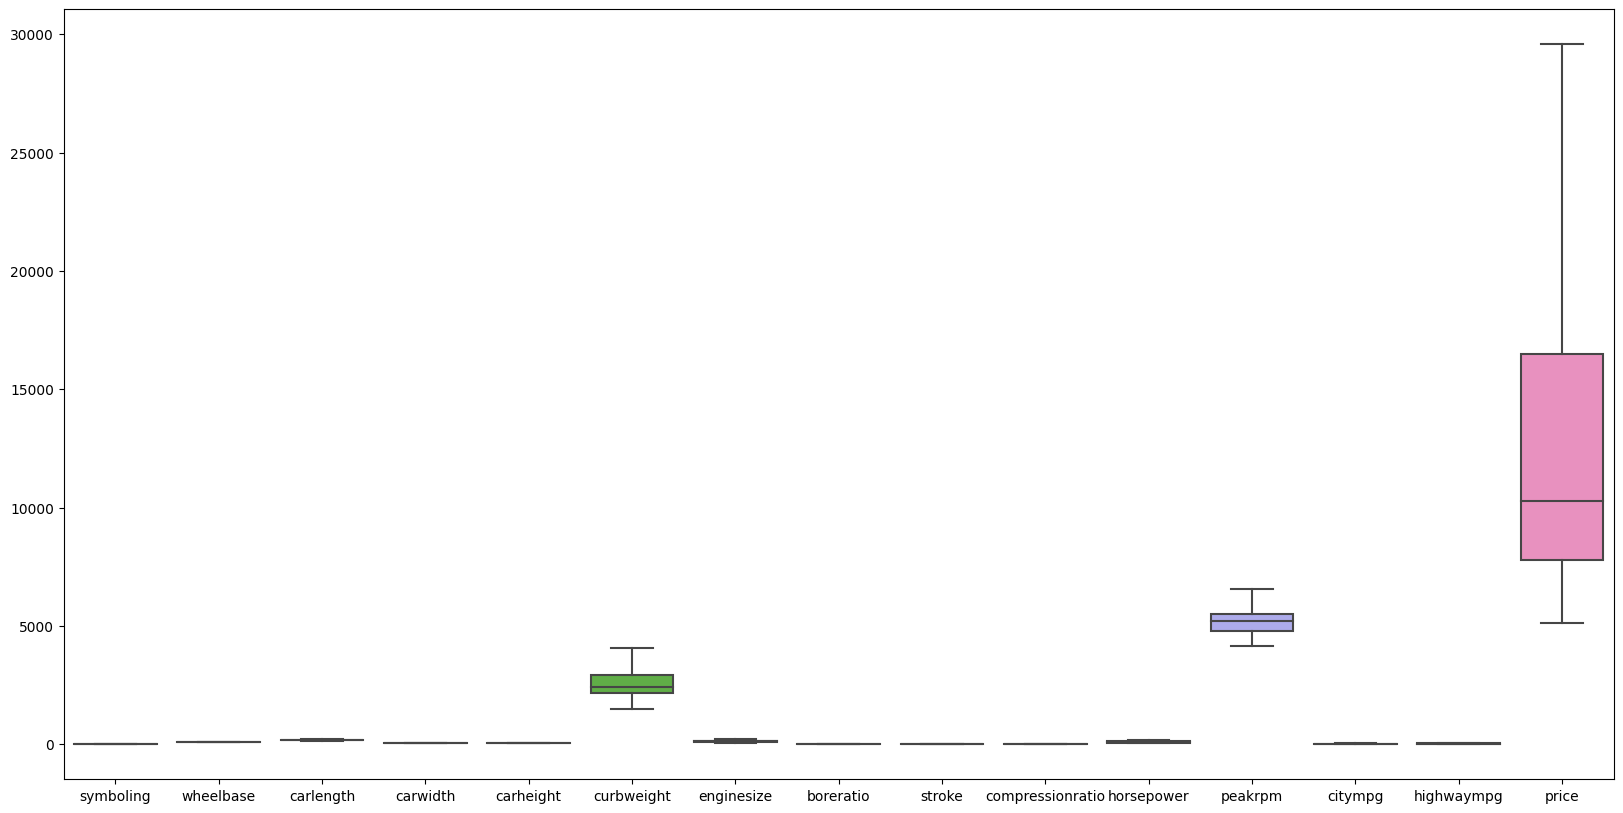

In [9]:
def replace_outliers(df):
    for col in df.columns.to_list():
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df[col] = np.where(df[col] > upper, upper, df[col])
        df[col] = np.where(df[col] < lower, lower, df[col])
    return df

df_con_col = df.drop(columns=cat_col,axis=1)
df_cat_col = df.drop(columns=df_con_col.columns.to_list(),axis=1)
df = df_cat_col.join([replace_outliers(df_con_col)])
plt.figure(figsize=(20,10))
sns.boxplot(df)

<Axes: >

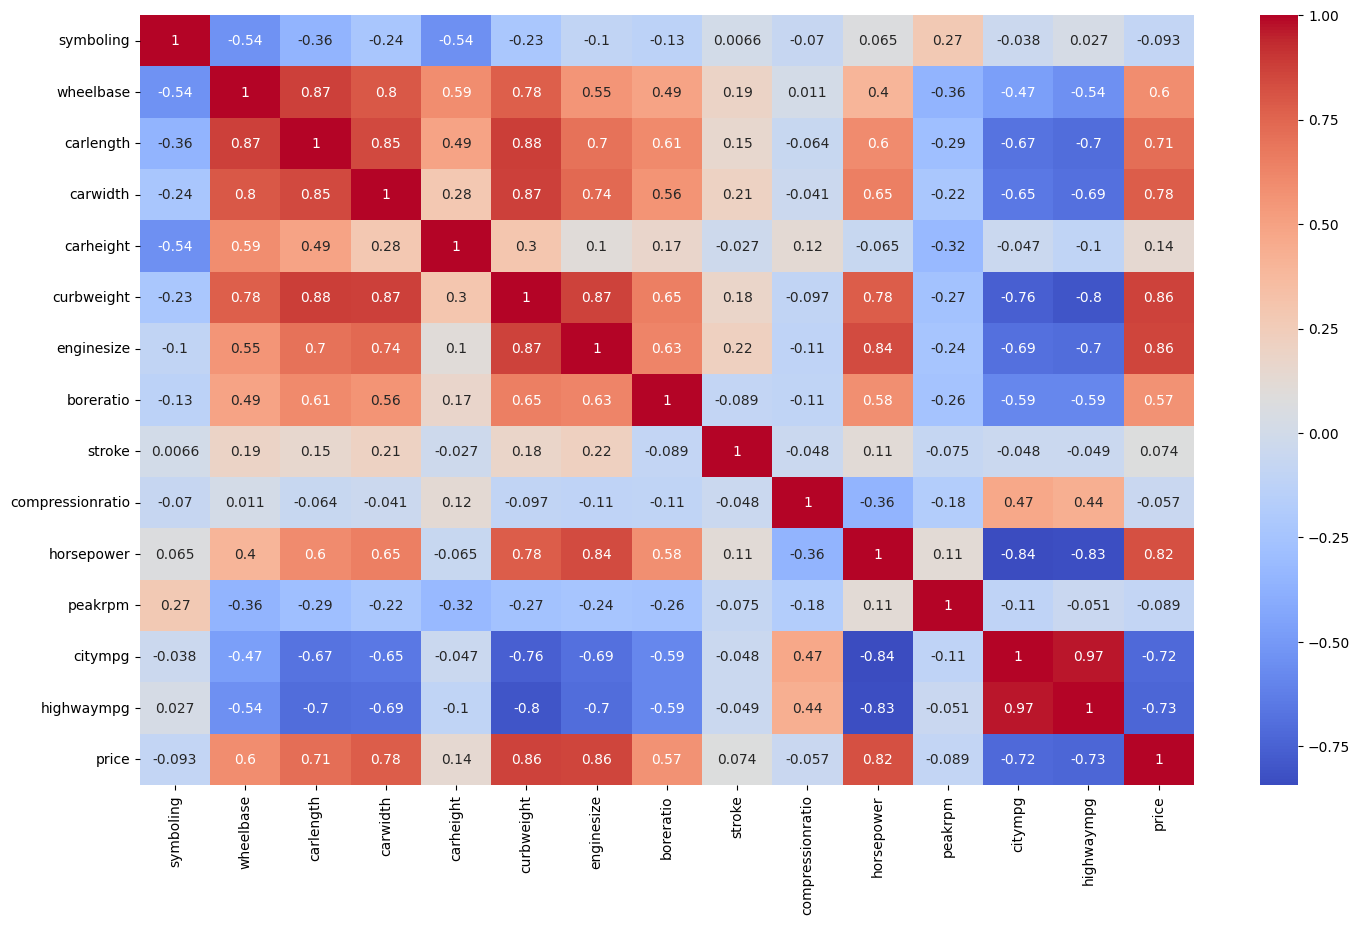

In [10]:
plt.figure(figsize=(17,10))
sns.heatmap(df.drop(columns=cat_col,axis=1).corr(),annot=True,cmap='coolwarm')

## Insights

- Bigger The Engine Size Is Greater The Price is
- Price is Negatively Correlated With City & Highway mpg But it's Strong Relation

In [11]:
df.drop(columns=['peakrpm','symboling'],axis=1,inplace=True)

*Performing Hot-one Encoding on Objects Having Two Unique Values*

In [12]:
encoded_df = pd.get_dummies(df, columns=cat_col)
pd.set_option('display.max_columns', 51)
encoded_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,21.0,27.0,13495.0,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,21.0,27.0,16500.0,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
3,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,19.0,26.0,16500.0,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,24.0,30.0,13950.0,False,True,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
5,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,18.0,22.0,17450.0,False,True,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [13]:
encoded_df.shape

(205, 51)

# Model Training

In [14]:
from sklearn.model_selection import train_test_split
y = encoded_df['price']
X = encoded_df.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [17]:
predictions = Lr.predict(X_test)

# Evaluating Predictions 

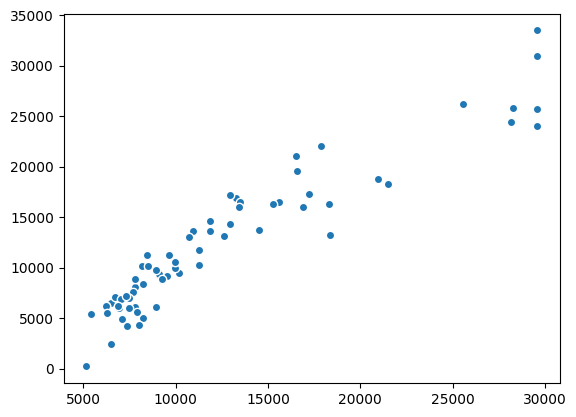

In [18]:
plt.scatter(y_test,predictions,edgecolors='white')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


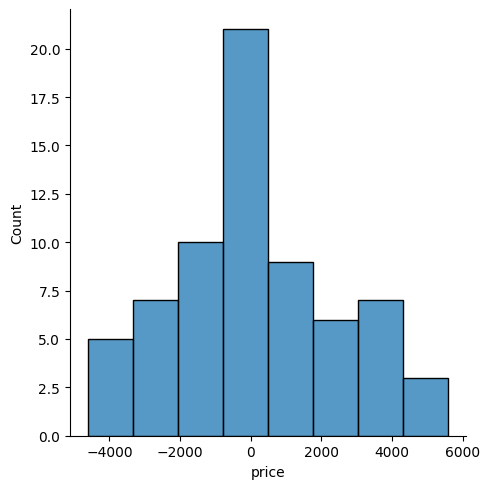

In [19]:
sns.displot((y_test-predictions),kind="hist");

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1800.4817683308106
MSE: 5516403.015043584
RMSE: 2348.702410916203
